In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load Titanic dataset
url = "https://github.com/datasciencedojo/datasets/blob/master/titanic.csv?raw=true"
data = pd.read_csv(url)

# Display basic information about the dataset
data.info()

# Display the first few rows
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# Check for missing values
data.isnull().sum()

# Handle missing values
# Fill missing Age values with the median (a common approach for numerical data)
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode (most frequent value)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column as it has too many missing values
data.drop('Cabin', axis=1, inplace=True)

# Check again for missing values to confirm changes
data.isnull().sum()


C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23496\1818411036.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Sakshi\AppData\Local\Temp\ipykernel_23496\1818411036.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Histograms show the distribution of a single numerical variable. They help us see the shape of the data (e.g., whether it's skewed, normally distributed) and identify outliers.

In [12]:
# Convert 'Sex' into numerical format using Label Encoding (0 for male, 1 for female)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' into numerical format using One-Hot Encoding
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Check the dataset to see the changes
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


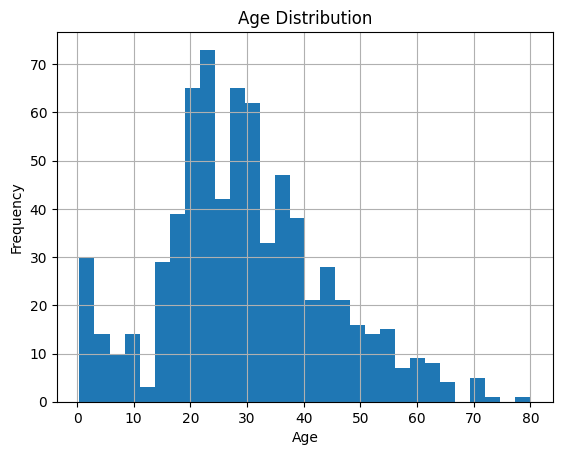

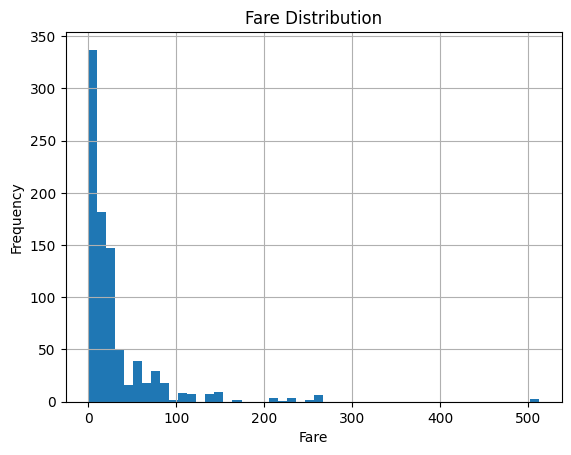

In [5]:
# Plot histogram for Age
data['Age'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for Fare
data['Fare'].hist(bins=50)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


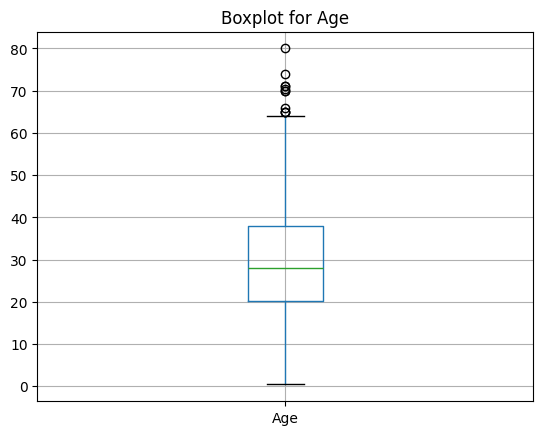

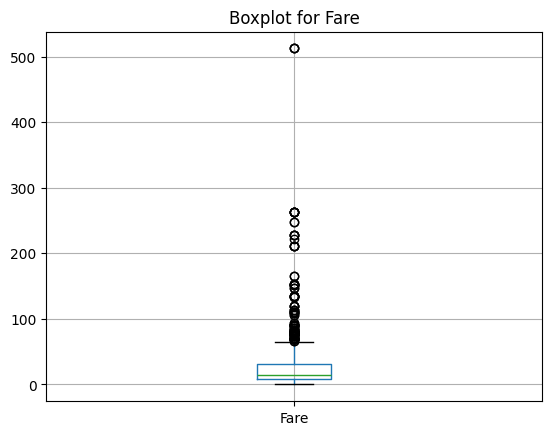

In [6]:
# Plot boxplot for Age
data.boxplot(column='Age')
plt.title('Boxplot for Age')
plt.show()

# Plot boxplot for Fare
data.boxplot(column='Fare')
plt.title('Boxplot for Fare')
plt.show()


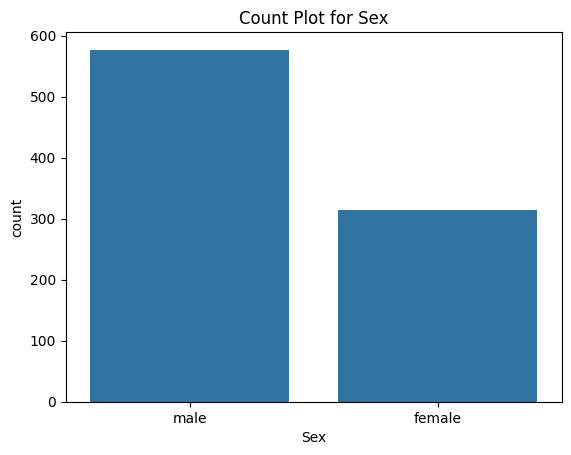

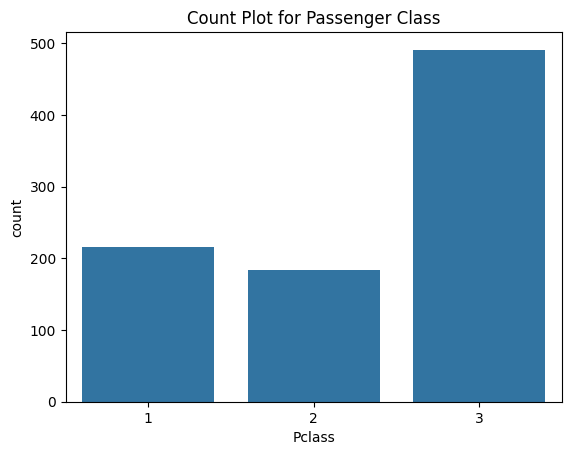

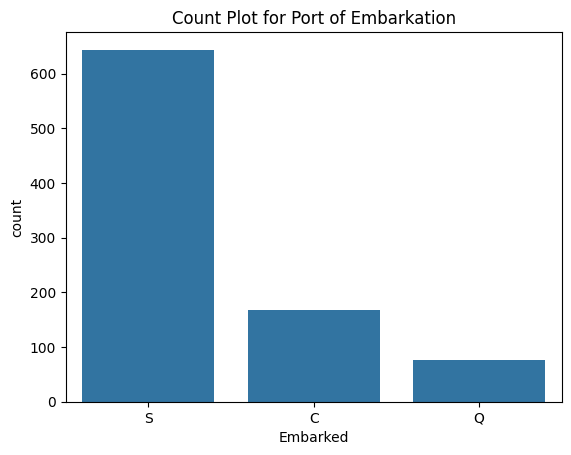

In [7]:
# Count plot for Sex
sns.countplot(x='Sex', data=data)
plt.title('Count Plot for Sex')
plt.show()

# Count plot for Pclass
sns.countplot(x='Pclass', data=data)
plt.title('Count Plot for Passenger Class')
plt.show()

# Count plot for Embarked
sns.countplot(x='Embarked', data=data)
plt.title('Count Plot for Port of Embarkation')
plt.show()


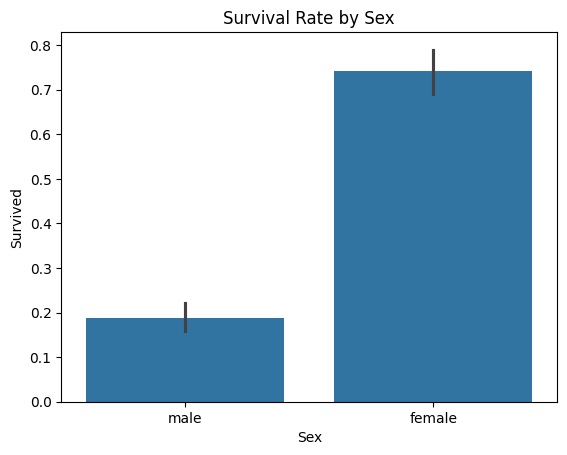

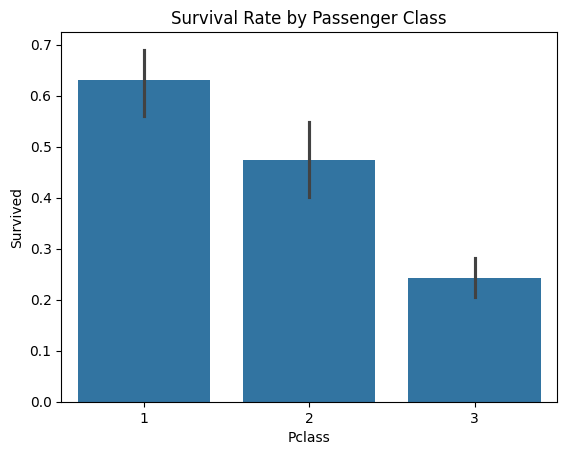

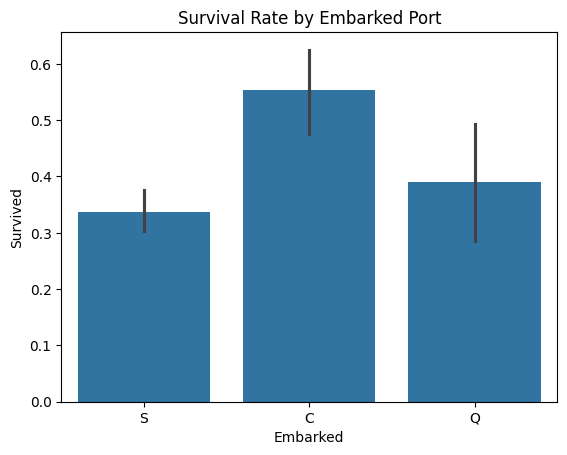

In [8]:
# Bar plot to compare survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# Bar plot to compare survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Bar plot to compare survival rate by Embarked
sns.barplot(x='Embarked', y='Survived', data=data)
plt.title('Survival Rate by Embarked Port')
plt.show()


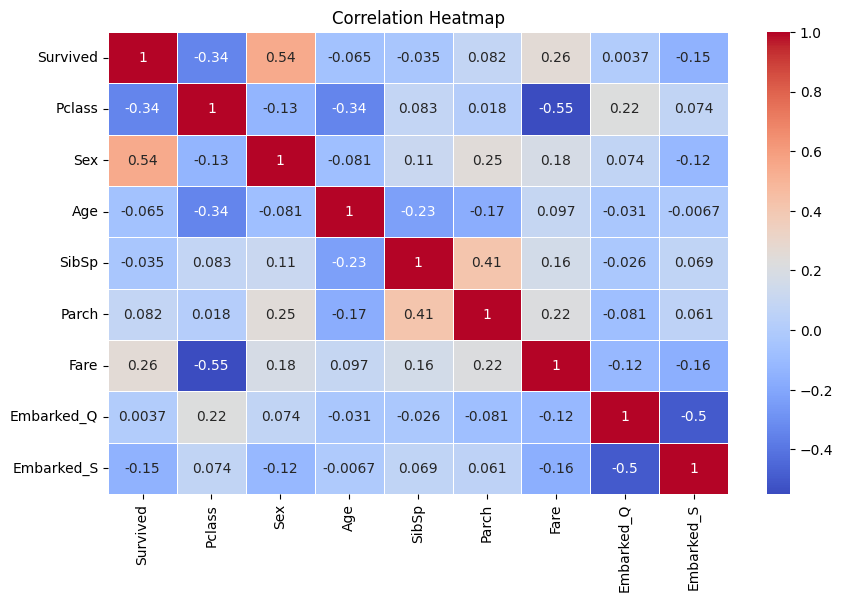

In [14]:
# Drop non-numerical columns that cannot be used in correlation matrix
numerical_data = data.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Check if categorical columns need encoding (e.g., Sex, Embarked)
# Assuming we have already done the encoding of categorical columns in earlier steps
# You can re-run the encoding if needed
# numerical_data['Sex'] = numerical_data['Sex'].map({'male': 0, 'female': 1})
# numerical_data = pd.get_dummies(numerical_data, columns=['Embarked'], drop_first=True)

# Now calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
# Function to handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Apply the function to Age and Fare columns
handle_outliers(data, 'Age')
handle_outliers(data, 'Fare')

# Check to see if outliers have been capped
data[['Age', 'Fare']].describe()


,Age,Fare
count,891.000000,891.000000
mean,29.039282,24.046813
std,12.072074,20.481625
min,2.500000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,54.500000,65.634400


In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the 'Age' and 'Fare' columns
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Check the scaled data
data[['Age', 'Fare']].describe()


,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.392400e-17,9.968332e-17
std,1.000562e+00,1.000562e+00
min,-2.199638e+00,-1.174727e+00
25%,-5.834321e-01,-7.882908e-01
50%,-8.613809e-02,-4.686152e-01
75%,4.940382e-01,3.396748e-01
max,2.110244e+00,2.031623e+00
